# Initialisation

In [1]:
import os
import sys
sys.path.append("../..") 
ROOT_DIR = '/home/jovyan/tta'

import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5000)

from comtrade.analysis import Analysis
tta = Analysis()

# Codes

In [16]:
# Code for india as reporter and partner
india = 699 
# Trade regime
# [{'id': '1', 'text': 'Import'}, {'id': '2', 'text': 'Export'}, 
# {'id': '3', 'text': 're-Export'}, {'id': '4', 'text': 're-Import'}]
# Chapter
cc = 710813

# Data Available

In [17]:
source = 699 # India
destination = 'ALL' # all
tta.set_source_destination(source, destination)

status = tta.api.data_available(india, 201912, 'HS', 'M')
print(status)

[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '699', 'rDesc': 'India', 'ps': '201912', 'TotalRecords': 251502, 'isOriginal': 1, 'publicationDate': '2020-03-02T00:00:00', 'isPartnerDetail': 1}]


## Data request

In [18]:
data_in, data_out = tta.get_import_data(2019, cc)
data = tta.compare(data_in, data_out, 'pt3ISO', 'rt3ISO')

{'r': 699, 'p': 'ALL', 'rg': 1, 'ps': 2019, 'px': 'HS', 'cc': 710813, 'freq': 'A', 'max': '100000'}
{'r': 'ALL', 'p': 699, 'rg': 2, 'ps': 2019, 'px': 'HS', 'cc': 710813, 'freq': 'A', 'max': '100000'}


## Data

In [21]:
df = pd.DataFrame.from_dict(data, orient='index')
df['value_diff'] = df['value_a'] - df['value_b']
df['quantity_diff'] = df['quantity_a'] - df['quantity_b']
df['quantity_diff'].round(2)
df['value_diff'].round(2)
df['quantity_pct'] = (df['quantity_diff'] / df['quantity_a']) * 100
df['value_pct'] = (df['value_diff'] / df['value_a']) * 100
df['quantity_pct'].round(2)
df['value_pct'].round(2)
df['value_diff_abs'] = abs(df['value_diff'])
df['value_pct_abs'] = abs(df['value_pct'])
df['iso'] = df.index
df

,code,desc,quantity_a,quantity_desc_a,value_a,quantity_b,quantity_desc_b,value_b,value_diff,quantity_diff,quantity_pct,value_pct,value_diff_abs,value_pct_abs,iso
WLD,710813,"Metals; gold, semi-manufactured",1925,Weight in kilograms,79.34,0,Weight in kilograms,0.00,79.34,1925,100.000000,100.000000,79.34,100.000000,WLD
CAN,710813,"Metals; gold, semi-manufactured",0,Weight in kilograms,0.00,0,Weight in kilograms,0.00,0.00,0,NaN,NaN,0.00,NaN,CAN
FRA,710813,"Metals; gold, semi-manufactured",11,Weight in kilograms,0.51,3,Weight in kilograms,0.00,0.51,8,72.727273,100.000000,0.51,100.000000,FRA
DEU,710813,"Metals; gold, semi-manufactured",154,Weight in kilograms,4.01,147,Weight in kilograms,3.41,0.60,7,4.545455,14.962594,0.60,14.962594,DEU
HKG,710813,"Metals; gold, semi-manufactured",132,Weight in kilograms,5.71,0,No Quantity,0.00,5.71,132,100.000000,100.000000,5.71,100.000000,HKG
IDN,710813,"Metals; gold, semi-manufactured",293,Weight in kilograms,12.08,528,Weight in kilograms,21.44,-9.36,-235,-80.204778,-77.483444,9.36,77.483444,IDN
ITA,710813,"Metals; gold, semi-manufactured",37,Weight in kilograms,1.68,126,Weight in kilograms,5.78,-4.10,-89,-240.540541,-244.047619,4.10,244.047619,ITA
JPN,710813,"Metals; gold, semi-manufactured",2,Weight in kilograms,0.11,0,Weight in kilograms,0.00,0.11,2,100.000000,100.000000,0.11,100.000000,JPN
KOR,710813,"Metals; gold, semi-manufactured",2,Weight in kilograms,0.05,0,Weight in kilograms,0.06,-0.01,2,100.000000,-20.000000,0.01,20.000000,KOR
SGP,710813,"Metals; gold, semi-manufactured",35,Weight in kilograms,1.67,3431,Weight in kilograms,155.75,-154.08,-3396,-9702.857143,-9226.347305,154.08,9226.347305,SGP


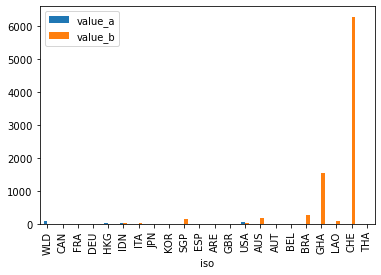

In [22]:
df.plot(kind='bar', y=['value_a','value_b'], x='iso')
plt.show()

## Aggregate

In [13]:
print("Total Export, as per Source data:", df['value_a'].sum(), " million USD.")
print("Total Import, as per Destination data:", df['value_b'].sum(), " million USD.")


Total Export, as per Source data: 62356.7  million USD.
Total Import, as per Destination data: 20865.799999999996  million USD.


## Filter
Remove data where the value difference is less than 10 million and percentage difference is less than 10%

In [14]:
percentage_cutoff = 10 # value to filter
value_diff_cutoff = 10 # value to filter
dfi = df[(df['value_pct_abs'] > percentage_cutoff) & (df['value_diff_abs'] > value_diff_cutoff)]
dfi.sort_values(by=['value_'])

,code,desc,quantity_a,quantity_desc_a,value_a,quantity_b,quantity_desc_b,value_b,value_diff,quantity_diff,quantity_pct,value_pct,value_diff_abs,value_pct_abs,iso
WLD,7108,Gold (including gold plated with platinum) unw...,836084,Weight in kilograms,31178.36,0,Weight in kilograms,0.00,31178.36,836084,100.000000,100.000000,31178.36,100.000000,WLD
TZA,7108,Gold (including gold plated with platinum) unw...,18782,Weight in kilograms,578.69,0,Weight in kilograms,0.00,578.69,18782,100.000000,100.000000,578.69,100.000000,TZA
GBR,7108,Gold (including gold plated with platinum) unw...,20108,Weight in kilograms,883.74,33,Weight in kilograms,1.31,882.43,20075,99.835886,99.851766,882.43,99.851766,GBR
TUR,7108,Gold (including gold plated with platinum) unw...,978,Weight in kilograms,40.67,679,Weight in kilograms,27.98,12.69,299,30.572597,31.202360,12.69,31.202360,TUR
ARE,7108,Gold (including gold plated with platinum) unw...,74333,Weight in kilograms,3319.33,0,Weight in kilograms,0.00,3319.33,74333,100.000000,100.000000,3319.33,100.000000,ARE
THA,7108,Gold (including gold plated with platinum) unw...,19410,Weight in kilograms,113.76,351,Weight in kilograms,15.48,98.28,19059,98.191654,86.392405,98.28,86.392405,THA
ZAF,7108,Gold (including gold plated with platinum) unw...,36052,Weight in kilograms,1604.32,0,Weight in kilograms,0.00,1604.32,36052,100.000000,100.000000,1604.32,100.000000,ZAF
SGP,7108,Gold (including gold plated with platinum) unw...,1246,Weight in kilograms,58.90,3579,Weight in kilograms,161.83,-102.93,-2333,-187.239165,-174.753820,102.93,174.753820,SGP
SAU,7108,Gold (including gold plated with platinum) unw...,9025,Weight in kilograms,295.09,0,Weight in kilograms,0.00,295.09,9025,100.000000,100.000000,295.09,100.000000,SAU
PER,7108,Gold (including gold plated with platinum) unw...,48560,Weight in kilograms,1606.18,0,Weight in kilograms,0.00,1606.18,48560,100.000000,100.000000,1606.18,100.000000,PER


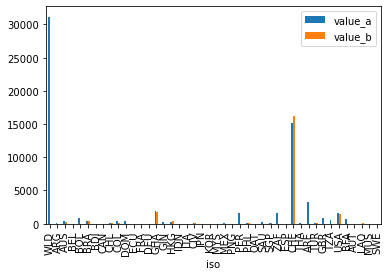

In [15]:
df.plot(kind='bar', y=['value_a','value_b'], x='iso')
plt.show()